In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

# 1. Prepare Dataset

In [70]:
# Toy Dataset

np.random.seed(42)
x_train = np.random.random_sample(size=(100,1))
y_train = x * np.random.random_sample(size=(100,1))

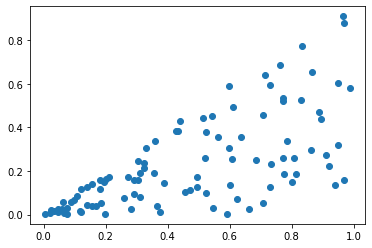

In [71]:
plt.scatter(x_train, y_train)

#2. Build Model

In [76]:
# hyper-parmas

input_size = 1
output_size = 1

num_epochs = 300
learning_rate = 0.05

In [77]:
# Model
model = nn.Linear(input_size, output_size)

In [78]:
# Define Loss & Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#3. Train the Model

In [79]:
for epoch in range(num_epochs):
    # Convert np arrays to torch tensors
    input = torch.Tensor(x_train)
    target = torch.Tensor(y_train)

    # Forward pass
    pred = model(input)
    loss = criterion(pred, target)

    # Backward pass
    optimizer.zero_grad() # 해주지 않으면 그레디언트가 계속 누적되어 이상한 결과를 냅니다.
    loss.backward()
    optimizer.step()

    if (epoch+1)%10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss : {loss.item():.4f}')

Epoch [10/300], Loss : 0.1977
Epoch [20/300], Loss : 0.1747
Epoch [30/300], Loss : 0.1548
Epoch [40/300], Loss : 0.1375
Epoch [50/300], Loss : 0.1226
Epoch [60/300], Loss : 0.1096
Epoch [70/300], Loss : 0.0983
Epoch [80/300], Loss : 0.0885
Epoch [90/300], Loss : 0.0801
Epoch [100/300], Loss : 0.0727
Epoch [110/300], Loss : 0.0663
Epoch [120/300], Loss : 0.0608
Epoch [130/300], Loss : 0.0560
Epoch [140/300], Loss : 0.0518
Epoch [150/300], Loss : 0.0482
Epoch [160/300], Loss : 0.0451
Epoch [170/300], Loss : 0.0423
Epoch [180/300], Loss : 0.0400
Epoch [190/300], Loss : 0.0379
Epoch [200/300], Loss : 0.0361
Epoch [210/300], Loss : 0.0346
Epoch [220/300], Loss : 0.0333
Epoch [230/300], Loss : 0.0321
Epoch [240/300], Loss : 0.0311
Epoch [250/300], Loss : 0.0302
Epoch [260/300], Loss : 0.0295
Epoch [270/300], Loss : 0.0288
Epoch [280/300], Loss : 0.0282
Epoch [290/300], Loss : 0.0277
Epoch [300/300], Loss : 0.0273


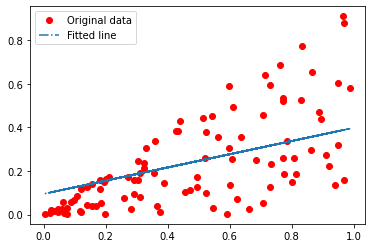

In [88]:
# Plot the graph
predicted = model(torch.Tensor(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, '-.', label='Fitted line')
plt.legend()
plt.show()

In [90]:
# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')